## Tensorflow MNIST
---

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

class ModelCallback(tf.keras.callbacks.Callback):
    def __init__(self, loss=0.0, acc=0.0):
        self.loss = loss
        self.acc = acc
    def on_epoch_end(self, epoch, logs={}):
        if (self.loss>0.0 and logs.get('loss')<self.loss) or \
           (self.acc>0.0 and logs.get('acc')>self.acc):
            self.model.stop_training = True
            
# data
mnist = tf.keras.datasets.mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
train_data = train_data/255.0
test_data = test_data/255.0

# model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# train
callbacks = ModelCallback(acc=0.99)
model.fit(train_data, train_labels, epochs=10, callbacks=[callbacks])

# evaluate
model.evaluate(test_data, test_labels) 

Epoch 1/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2506 - acc: 0.9287
Epoch 2/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1105 - acc: 0.9675
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0772 - acc: 0.9762
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0583 - acc: 0.9819
Epoch 5/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0452 - acc: 0.9855
Epoch 6/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0355 - acc: 0.9889
Epoch 7/10
10000/10000 [==============================] - 1s 57us/sample - loss: 0.0895 - acc: 0.9729


[0.08948575189474504, 0.9729]

---
### Predicciones


prediction: 8 3 6 5 5 9 3 7 0 6 

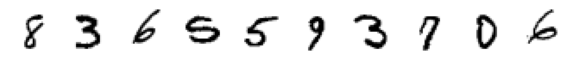

In [13]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(test_data)

fig, axis = plt.subplots(nrows=1, ncols=10, figsize=(10,1))

nums = []
for i in range(10):
    nums.append(np.random.randint(0, test_data.shape[0]+1))
    axis[i].imshow(test_data[nums[i],:].reshape(28, 28, order="F"), cmap="gray_r")
    axis[i].axis("off")

print("prediction:", end=" ")
for i in nums:
    print(np.argmax(predictions[i]), end=" ")